# Matplotlib

Similar to NumPy and other Python DS/ML packages, Matplotlib also has import conventions. For example, to have inline plots in Jupyter notebooks, we use `%pylab` magic command:

In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In a Python script we can do:
```python
from matplotlib import pyplot as plt
```

## Figures

The basic plotting entity in Matplotlib is `figure`, containing default sizing and settings, such as range

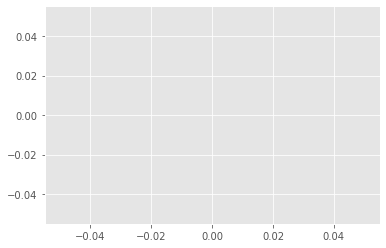

In [86]:
plt.figure() #we do this explicitly, although we don't need to, because later we will use it to change different settings
plt.plot()
plt.show() #if we wern't using inline, we we need this to show our figure

We created a figure (`plt.figure()`), plotted nothing on it (`plt.plot()`), and displayed it (`plt.show()`). Note, that `plt.show()` is not needed if you create a single figure, as Jupyter will display it anyway.

We can specify figure dimensions as well (note that we use semicolon to supress output, compare this to the previous cell with `plt.show()`):

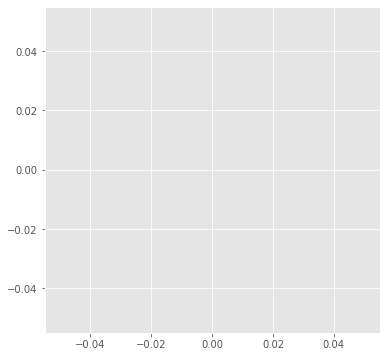

In [87]:
# Figure can have size (in inches)
plt.figure(figsize=(6,6))
plt.plot();

We see several elements of the plots already:

- axes (do not confuse with ax*i*s),
- (major) ticks,
- (major) tick labels.

Note, that Matplotlib uses default ranges for both `X` axis and `Y` axis. Let's plot something:

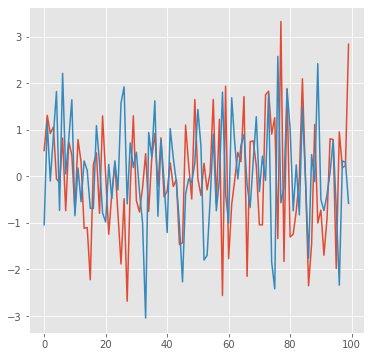

In [88]:
plt.figure(figsize=(6,6))
plt.plot(np.random.randn(100)) #random of a normal distribution
plt.plot(np.random.randn(100));

As we can see, `plt.plot` makes line plots, and has some set of colors to choose from. Matplotlib also adjusted the ranges to fit the actual data. There's another way to achieve the same by using axes object directly (used very often when dealing with subplots):

To note: matplotlib by default has a color ramp, and will iterate over those colors for as many plots you add. Also, the ranges self adjust on the axes.

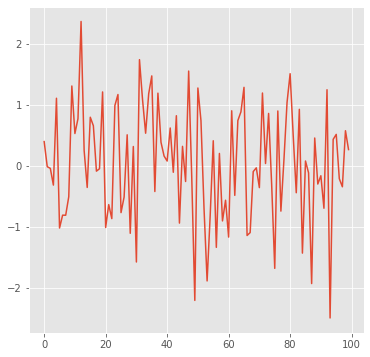

In [89]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()  # Get current axes
ax.plot(np.random.randn(100));
#In reality, youa ren't plotting on the figure, rather the canvas (axis) itself. We can access this axis, and use it explicitly, used more often when
#trying to plot several plots at once


Our plot doesn't have a title, and labels for `X` axis and `Y` axis. Let's add some:

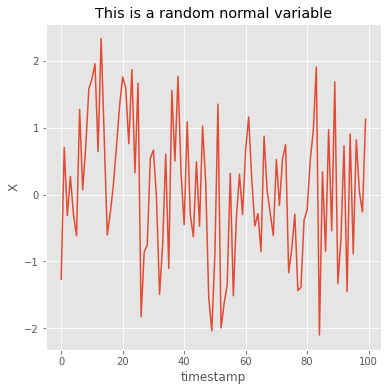

In [90]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()  # Get current axes

# Note, that plot itself is an object you can work with
line_plot = ax.plot(np.random.randn(100)) 
ax.set_title("This is a random normal variable")
ax.set_xlabel("timestamp")
ax.set_ylabel("X");
#We don't have to use ax to create these specs, and we have shortcuts using plt in the next cell

The same plot can be created directly with `plt` as the following:

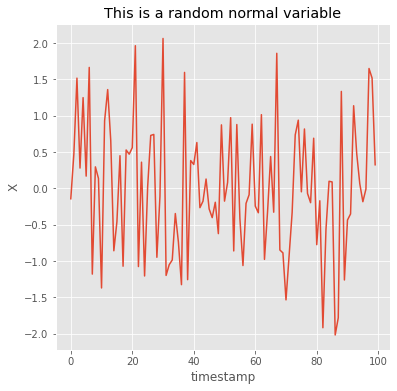

In [91]:
fig = plt.figure(figsize=(6,6))

# Note, that plot itself is an object you can work with
line_plot = plt.plot(np.random.randn(100)) 
plt.title("This is a random normal variable")
plt.xlabel("timestamp")
plt.ylabel("X");

Although you will rarely use this feature directly, you can modify `line_plot` (and other types of plots as well) directly:

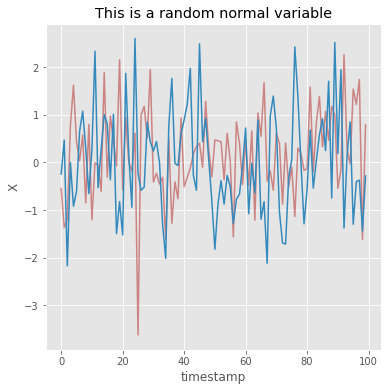

In [92]:
fig = plt.figure(figsize=(6,6))

# Note, that plot itself is an object you can work with. This will return a list, because you can plot many arrays at the same time.
line_plot = plt.plot(np.random.randn(100)) 
plt.plot(np.random.randn(100))
# Change the color and alpha
l = line_plot[0]
l.set_alpha(0.5) #transparency of the line.
l.set_color("firebrick") #matplotlib has a lot of colors whicha are named, which you can google.

plt.title("This is a random normal variable")
plt.xlabel("timestamp")
plt.ylabel("X");

`plt.plot` can plot multiple lines at once, hence, `line_plot` is a list (with only one element in this case).

## Line plots

Let's consider line plots in more details. First let's generate some data:

In [93]:
NUM_POINTS = 1000

In [94]:
x = np.linspace(0, 4.*np.pi, NUM_POINTS)
y = np.sin(x) + np.random.normal(0, 0.1, NUM_POINTS) #adding these two arrays to eachother creates noise at each marker. without the random additions, we would just get a straight line
yy = np.cos(x) + np.random.normal(0, 0.1, NUM_POINTS)

Note, that we never imported NumPy. But how do we have `np`?

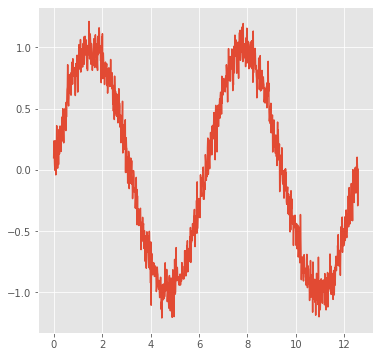

In [95]:
plt.figure(figsize=(6,6))
plt.plot(x, y);

Let's add more details to the plot:

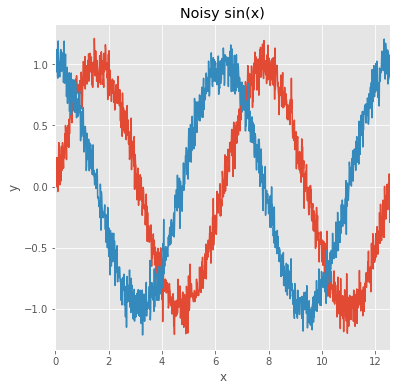

In [96]:
plt.figure(figsize=(6,6))

# Note the notation for plotting multiple lines at once
plt.plot(x, y, x, yy)

# Add labels
plt.xlabel('x')
plt.ylabel('y')

# Turn grid on
plt.grid(True)

# Set X axis range manually
plt.xlim(0, 4*np.pi)

# Add title
plt.title("Noisy sin(x)");

Our plot looks much better than default, but still it's to simplistic. Matplotlib has a set of predefined styles (i.e. sets of color ramps, font sizes, line styles and so on) we can use. Let's take one from `ggplot` package of `R` language:

In [97]:
plt.style.use('ggplot') #Change to other predefined style. Usually, include this after the pyplot inline.
#We could also set the style on a specific plot by doing:
# with plt.stylye.context("bmh") 
#   plt.figure(figsize = (6,6)))

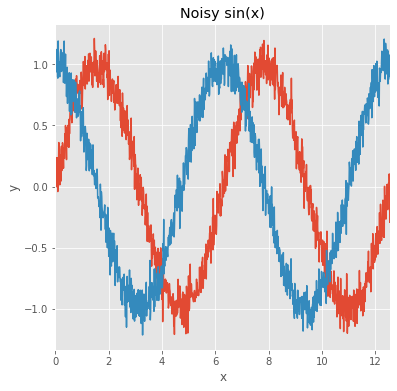

In [98]:
plt.figure(figsize=(6,6))

plt.plot(x, y, x, yy)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True) #add a grid to our graph

plt.xlim(0, 4*np.pi) #change the limits of the hashes

plt.title("Noisy sin(x)");

Let's play with styling further:

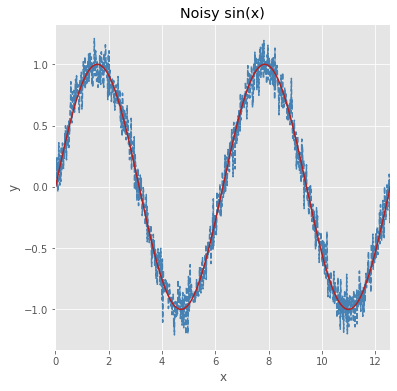

In [99]:
plt.figure(figsize=(6,6))

# Change line style to dash and add custom color
plt.plot(x, y, '--', c='steelblue')
plt.plot(x, np.sin(x), c='firebrick') #we can draw on top of it an original function witha  different color (same as x y above, jsut without the noise.)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

plt.title("Noisy sin(x)");

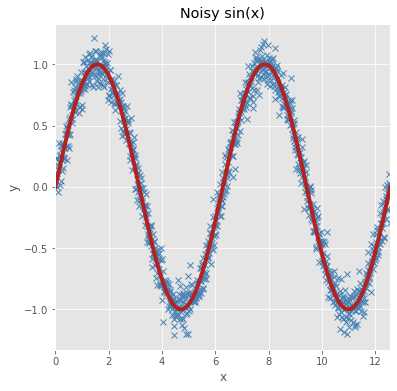

In [100]:
plt.figure(figsize=(6,6))

# Change line style to crosses and specify markersize
plt.plot(x, y, 'x', markersize=6, c='steelblue') #using the cross marker for the shape of each point (can also use 'o')
plt.plot(x, np.sin(x), c='firebrick', linewidth=4)

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

plt.title("Noisy sin(x)");

### Legends

One important element we're missing is plot legend. We can add one by labeling each **artist** (i.e. line plot, bar plot, etc.):

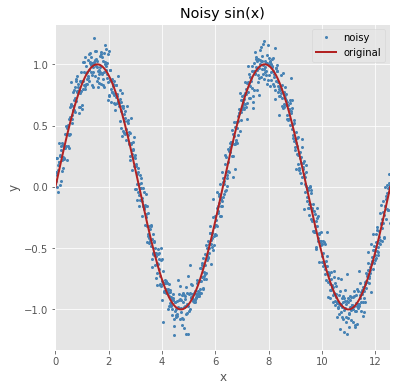

In [101]:
plt.figure(figsize=(6,6))

# Adding a label
plt.plot(x, y, 'o', markersize=2, c='steelblue', label='noisy')
plt.plot(x, np.sin(x), c='firebrick', linewidth=2, label='original')

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(0, 4*np.pi)

# Placing legend manually
# Location 0 means "best" (based on data plotted)
plt.legend(loc=0) #We have to provide a location for the legend. putting 0 tells matplot lib to find the "best" place. The options go up to 10, each digit
    # giving a different location

plt.title("Noisy sin(x)");

This plot looks way better compared to the original and we can use in a report or slides.

## Scatter plots

Scatter plot is another type of plot, which visualizes a pair of data elements with neither having any specific ordered (like time, of spatial coordinate) meaning:

In [102]:
x = np.random.randn(NUM_POINTS)
y = x + np.random.normal(0, 0.1, NUM_POINTS)

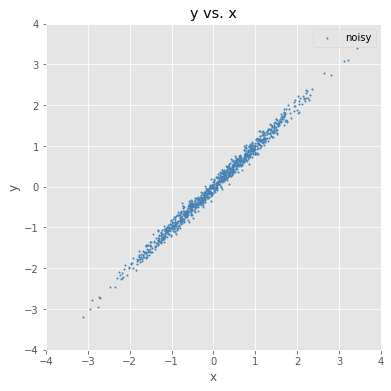

In [103]:
plt.figure(figsize=(6,6))

# Note that use short s instead of markersize
plt.scatter(x, y, marker='o', s=2, c='steelblue', label='noisy') #creates the scatter

plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.legend(loc=0)

plt.title("y vs. x");

We can set marker sized for each point:

In [104]:
sz = np.random.randint(2, 32, size=(NUM_POINTS,))

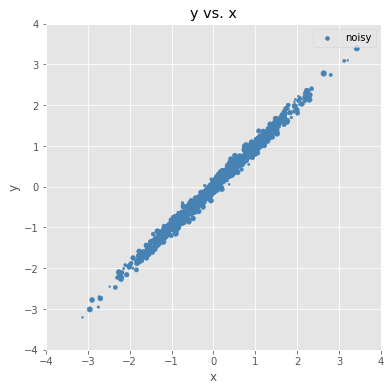

In [105]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, marker='o', s=sz, c='steelblue', label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x");
#hard to see the sizes here because they arre all smashed together, but they are.

We can add color to each point as well:

In [106]:
colors = x + np.random.normal(0, 0.1, size=(NUM_POINTS,)) #array with the same array size as x

In [107]:
colors 

array([ 7.31320404e-01,  9.53818010e-01, -8.50405449e-01,  2.55190337e+00,
       -1.80672490e-01,  1.56124928e+00, -1.53696370e-01, -8.10518959e-01,
        6.19840467e-01, -1.27359557e+00,  1.14503941e+00, -2.02198814e+00,
       -4.88556049e-03,  5.23373199e-01, -5.42175246e-01, -1.01931152e+00,
        3.36785134e+00,  1.02999837e+00,  1.58646703e-01,  1.02806951e+00,
        9.48134519e-01, -2.48789624e-01,  1.45533890e+00,  5.83470303e-01,
       -7.18139943e-01, -8.82752969e-01, -7.95591375e-01,  5.12301110e-01,
       -4.76996043e-01, -1.05891104e+00,  1.28204194e+00, -4.23784115e-01,
        1.13587542e-01, -1.36944408e+00,  1.50422612e+00,  2.23509725e-01,
       -8.70411694e-01,  1.62091888e+00,  2.45807265e-01,  1.41132776e+00,
        1.41646541e+00, -5.66061067e-01,  1.74575160e+00,  4.24064948e-01,
        6.94062138e-01,  1.24015788e+00, -1.66499650e-01, -1.08084675e-01,
       -4.48390319e-01, -8.79461321e-01,  6.04732730e-01, -1.01540748e+00,
        8.78730908e-01,  

The "colors" are not real colors but some floating point numbers. That's ok, as Matplotlib has a lot of predefined **color maps**, and will **map** those numbers to selected color map:

Text(0.5, 1.0, 'y vs. x')

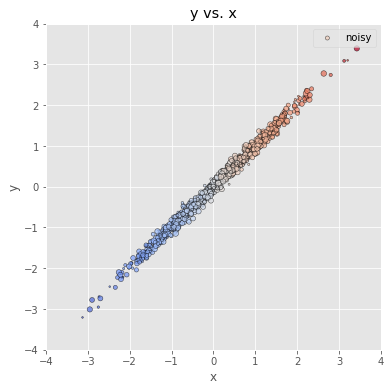

In [108]:
plt.figure(figsize=(6,6))

# We also add edgecolor here
plt.scatter(x, y, marker='o', alpha=0.7, s=sz, c=colors, edgecolor='k', #edge color sets the color of the edge of each marker. 'k' means black. we could also write 'black'
            cmap=plt.cm.coolwarm, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x")

We can visualize the mapping itself:

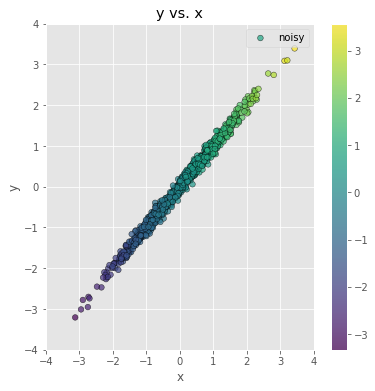

In [109]:
plt.figure(figsize=(6,6)) 

plt.scatter(x, y, marker='o', alpha=0.7, s=32, c=colors, #note how we are using the defualt cmap, and not the one we used in the above cell.
            edgecolor='k', label='noisy')                  #because of the lack of density in the colors, coolwarm isn't the best color scheme to highlight the mapping

# You can vis the colormap if some mapping was actually created
plt.colorbar()

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x");

The plot above has a bit too much air around, let's tighten it up:

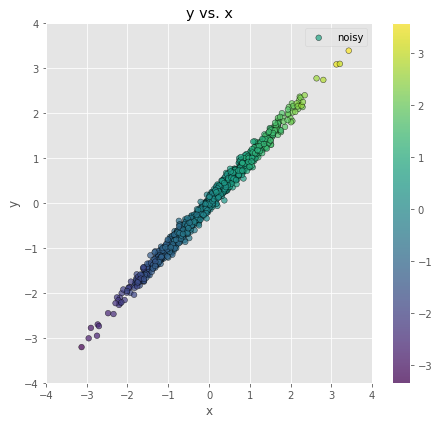

In [110]:
plt.figure(figsize=(6.5,6))

# Now Matplotlib uses the default Viridis colormap
plt.scatter(x, y, marker='o', alpha=0.7, s=32, c=colors,
            edgecolor='k', label='noisy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x")
plt.tight_layout(); #tighten up the layout to remove whitespace.

## Histograms
Histograms are indispensable in analysing data distributions. They are easy to create in Matplotlib.

Often we won't use plt.hist directly, as we most often will be using straight from pandas. However, pandas is using matplotlib under the hood, and its important to know the parameters as they are the same.

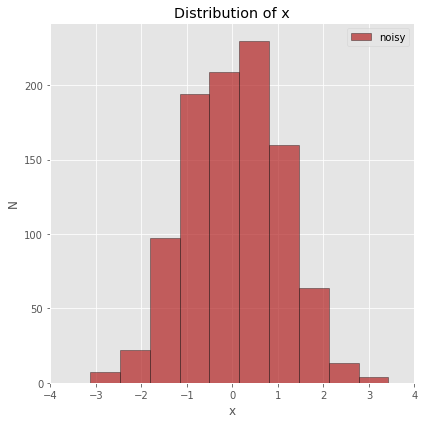

In [111]:
plt.figure(figsize=(6,6))

plt.hist(x, alpha=0.7, color='firebrick', edgecolor='k', label='noisy')

plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.legend(loc=0)

plt.title("Distribution of x")
plt.tight_layout();

Matplotlib selected some default number of bins and calculated the histogram range from the data, and the width of each dependent on the data. Statistics use specific mathmatics for analysis, however we are just doing general anlysis so we can keep things simple. Let's adjust those:

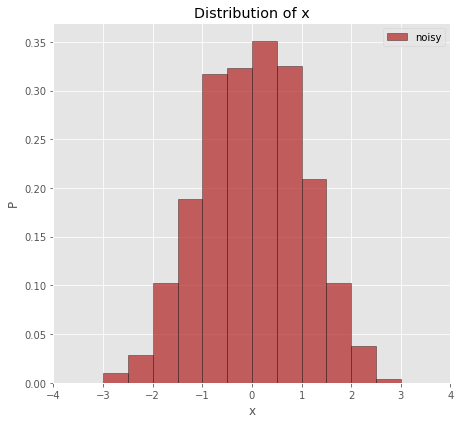

In [112]:
plt.figure(figsize=(6.5,6))

# We also switch from counts to density histogram
plt.hist(x, bins=12, range=(-3, 3), #anything past -3 and 3 will be included inside.
         density=True, #Gives us the density function, instead of the total counts to give us more accurate ratios.
         alpha=0.7, color='firebrick', edgecolor='k', label='noisy')

plt.xlabel('x')
plt.ylabel('P')

plt.grid(True)
plt.xlim(-4, 4)

plt.legend(loc=0)

plt.title("Distribution of x")
plt.tight_layout();

We can plot not a distribution, but a cumulative distribution:

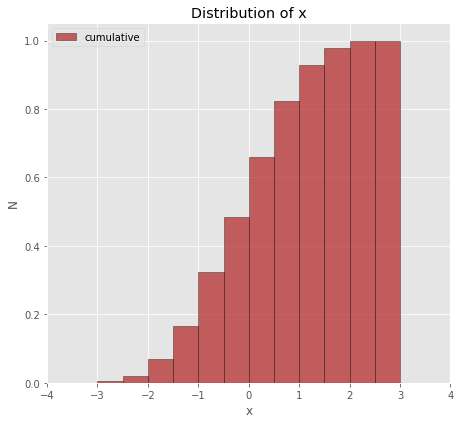

In [113]:
plt.figure(figsize=(6.5,6))
plt.hist(x, bins=12, range=(-3, 3),
         cumulative=True,
         density=True, alpha=0.7, color='firebrick',
         edgecolor='k', label='cumulative')
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x")
plt.tight_layout();

Or create a stacked histogram, when we have two random variables:

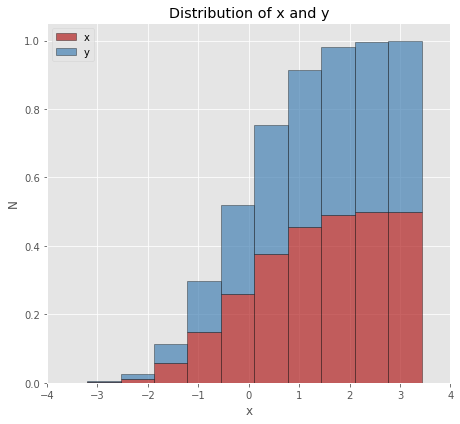

In [114]:
plt.figure(figsize=(6.5,6))
plt.hist([x, y], alpha=0.7, color=('firebrick', 'steelblue'),
         histtype='barstacked', #stacked histogram
         cumulative=True, density=True, #cumulative is true, creating a cumulative distribution. Delete, for the counts.
         edgecolor='k', label=('x', 'y'))
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x and y")
plt.tight_layout();

Btw, font size for title looks weird, let's make it smaller (default is 14):

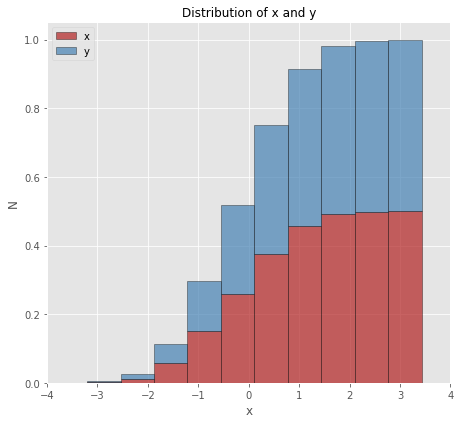

In [115]:
plt.figure(figsize=(6.5,6))
plt.hist([x, y], alpha=0.7, color=('firebrick', 'steelblue'),
         histtype='barstacked',
         cumulative=True, density=True,
         edgecolor='k', label=('x', 'y'))
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.legend(loc=0)
plt.title("Distribution of x and y", fontsize=12) #change font size
plt.tight_layout();

## Boxplots

Another way of visualizing data distributions is with box plots. Similar to histrograms, useful when we have multiple variables, as it becomes more readable than many histograms. Also, we might not need the whole distribution, just the ranges for the different quantiles. This one is also more commonly used through pandas:

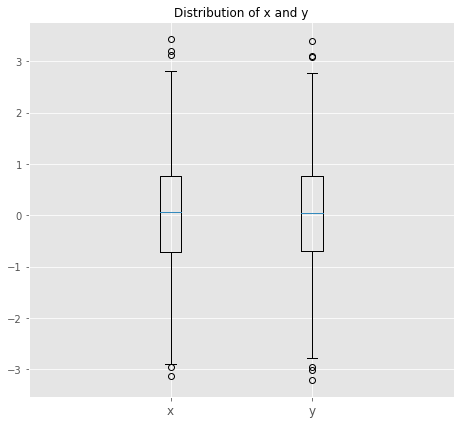

In [116]:
plt.figure(figsize=(6.5,6))
plt.boxplot([x, y])
plt.grid(True)
plt.xlim(0, 3)
plt.title("Distribution of x and y", fontsize=12)

# Note, how we set ticks
plt.xticks([1, 2], ['x', 'y'], fontsize=12)
plt.tight_layout();

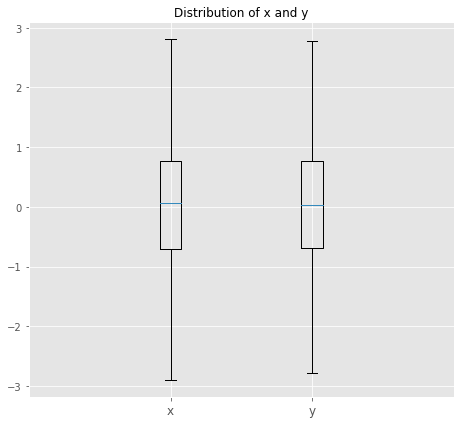

In [117]:
plt.figure(figsize=(6.5,6))
plt.boxplot([x, y], showfliers=False) #showfliers calse removes the individual markers
plt.grid(True)
plt.xlim(0, 3)
plt.title("Distribution of x and y", fontsize=12)

# Note, how we set ticks
plt.xticks([1, 2], ['x', 'y'], fontsize=12) #xticks means, that we want the major ticks to be at these locations, with these labels.
plt.tight_layout();

## Subplots

Very often you may need to place multiple plot on the same image. This is achieved with `plt.subplot`:

<ipython-input-136-c511588105fe>:46: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout();


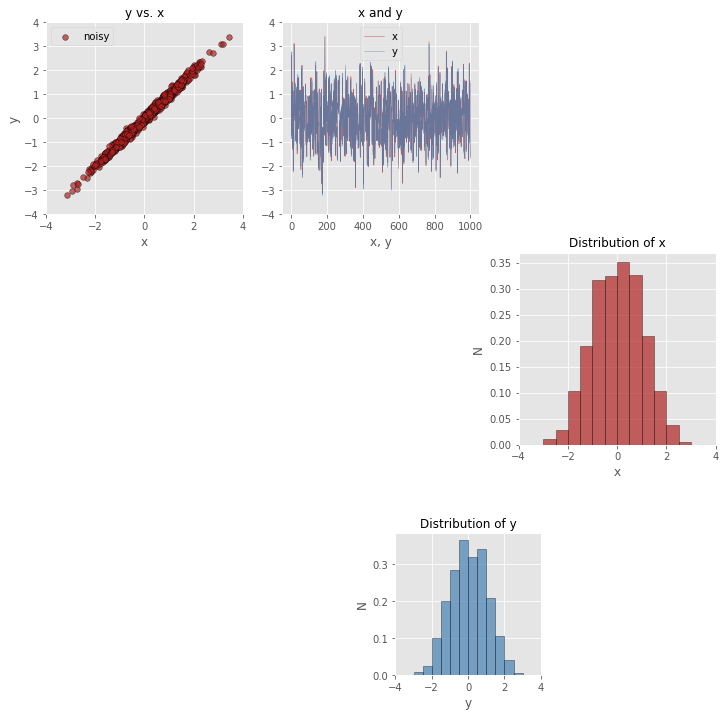

In [136]:
plt.figure(figsize=(12,12))

# First subplot
ax1 = plt.subplot(3, 3, 1) #number of rows, cols, then index of the plot (upper left is 1, to the right is 2, top left is 3, etc.)
# Note, that plt.plot and others use current axes (which now is ax1)
# We do not need to use `ax1` directly (although we can). Meaning, we could remove ax1 and ax2, and we would get the same result here.
#We have them here just to illustrate that we can store the subplots into the axes, so that we can reference them later (even though we have changed axes).
# Gridspec can give us more complicated layouts (google for documentation)
plt.scatter(x, y, marker='o', alpha=0.7, s=32, c='firebrick', edgecolor='k', label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("y vs. x", fontsize=12)

# Second subplot
ax2= plt.subplot(3, 3, 2)
plt.plot(x, c='firebrick', linewidth=0.5, alpha=0.7, label='x')
plt.plot(y, c='steelblue', linewidth=0.5, alpha=0.7, label='y')
plt.xlabel('x, y')
plt.grid(True)
plt.ylim(-4, 4)
plt.legend(loc=0)
plt.title("x and y", fontsize=12)

# Third subplot-- 
plt.subplot(3, 3, 6)
plt.hist(x, bins=12, range=(-3, 3), density=True, alpha=0.7, color='firebrick', edgecolor='k')
plt.xlabel('x')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.title("Distribution of x", fontsize=12)

# Fourth subplot
plt.subplot(4, 4, 15) #sized to a 4X4 grid, in the 15th position
plt.hist(y, bins=12, range=(-3, 3), density=True, alpha=0.7, color='steelblue', edgecolor='k')
plt.xlabel('y')
plt.ylabel('N')
plt.grid(True)
plt.xlim(-4, 4)
plt.title("Distribution of y", fontsize=12)

plt.tight_layout();

Depending on window size of your browser, you may need to double click on the image, since Jupyter places images into available width.

We can also add a super title if needed with `plt.suptitle`.

# Seaborn

Matplotlib is a somewhat low-level package. To create complex plots we have to do a lot of things manually. Seaborn is a wrapper on top of Matplotlib, which allows for simpler plotting of complex plots. Import convention is:

In [119]:
import seaborn as sns

For example, instead of plotting histogram with Matplotlib, we can do:

C:\Users\sfrie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


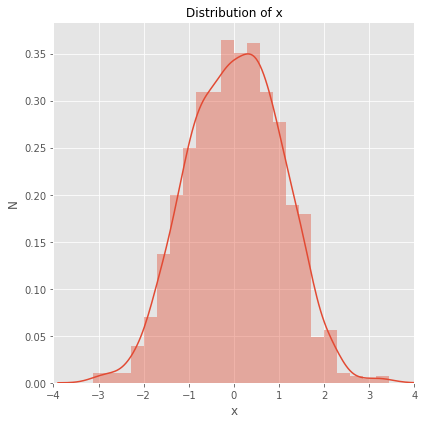

In [120]:
plt.figure(figsize=(6,6))
sns.distplot(x, ax=plt.gca()) #before we used histogram, but this plot makes something more interesting

plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.title("Distribution of x", fontsize=12)
plt.tight_layout();

We can forward the parameters to Matplotlib's `plt.hist` (which is used under the hood):

C:\Users\sfrie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


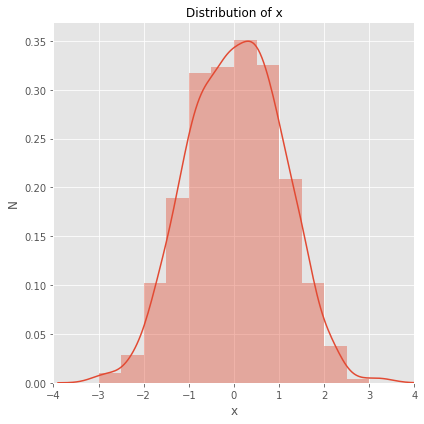

In [121]:
plt.figure(figsize=(6,6))

# `bins` are placed directly, and not in `hist_kws`
sns.distplot(x, ax=plt.gca(), bins=12, hist_kws={"range": (-3, 3)}) #of course, we can change the bins and range, using hist_kws

plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.title("Distribution of x", fontsize=12)
plt.tight_layout();

Or draw kernel density estimate line differently:

C:\Users\sfrie\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


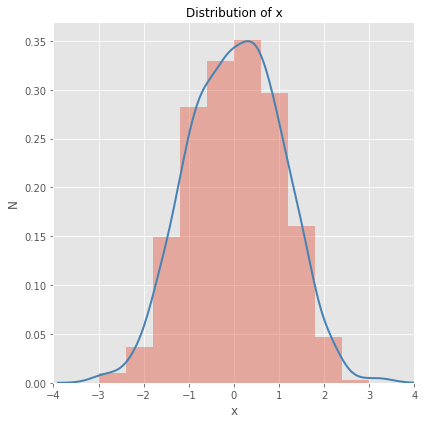

In [122]:
plt.figure(figsize=(6,6))

# `bins` are placed directly, and not in `hist_kws`
sns.distplot(x, ax=plt.gca(), bins=10,
             hist_kws={"range": (-3, 3)},
             kde_kws={"color": "steelblue", "linewidth": 2})

plt.xlabel('x')
plt.ylabel('N')

plt.grid(True)

plt.xlim(-4, 4)

plt.title("Distribution of x", fontsize=12)
plt.tight_layout();

If f you go to the seaborn gallery, you can see the more complicated graphs we can make in seaborn that we cant in matplot lib.

An example of this is a heatmap, when we have many different variables and want to see the correlations.
